In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split

In [50]:
df_pred=pd.read_csv("df_cc.csv")
df_pred.drop('Unnamed: 0', axis=1, inplace=True)
df_pred

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,difference,hour
0,104983,6,2.31,2.69,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,5.8,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8
1,104984,7,2.38,2.79,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,5.8,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8
2,104985,8,2.37,2.83,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,5.8,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8
3,104986,9,2.44,2.84,2.2,2024-02-23 08:00:00,5.2,95,1,17.0,...,5.8,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8
4,104987,10,2.32,2.68,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,5.8,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,106183,6,3.70,4.24,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,9.6,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8
251,106184,7,3.80,3.99,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,9.6,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8
252,106185,8,3.80,4.19,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,9.6,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8
253,106186,9,4.02,4.39,0.8,2024-03-04 08:00:00,9.6,88,3,0.5,...,9.6,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8


In [51]:
df_pred.isna().any()

id                 False
device_id          False
active_power       False
direct_power       False
charge_capacity    False
date_time          False
T                  False
U                  False
Ff                 False
RRR                False
DD_WE              False
DD_NS              False
Po(p)              False
POA                False
cc_diff            False
active_power_b     False
date_time_b        False
T_b                False
U_b                False
Ff_b               False
RRR_b              False
DD_WE_b            False
DD_NS_b            False
Po(p)_b            False
POA_b              False
difference         False
hour               False
dtype: bool

In [52]:
features = ['T', 'U', 'Ff',	'RRR', 'DD_WE', 'DD_NS', 'POA', 'Po(p)', 'hour',
            'T_b', 'U_b', 'Ff_b', 'RRR_b', 'DD_WE_b', 'DD_NS_b', 'POA_b', 'Po(p)_b']

X_pred = df_pred[features]
y_pred = df_pred['cc_diff']

In [53]:
df=pd.read_csv("../models_cc_data/df_cc_init.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,date_time_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
0,19128,6,65.24,66.29,195.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
1,19129,7,72.97,74.12,196.3,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
2,19130,8,65.92,66.98,199.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
3,19131,9,72.45,73.67,232.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
4,19132,10,60.01,60.98,182.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2391,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2392,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2393,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14


In [54]:
features = ['T', 'U', 'Ff',	'RRR', 'DD_WE', 'DD_NS', 'POA', 'Po(p)', 'hour',
            'T_b', 'U_b', 'Ff_b', 'RRR_b', 'DD_WE_b', 'DD_NS_b', 'POA_b', 'Po(p)_b']

X = df[features]
y = df['cc_diff']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

gb = GradientBoostingRegressor()

# RandomizedSearchCV setup
gb_random = RandomizedSearchCV(gb, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, verbose=-1, random_state=100, 
                                   n_jobs=-1, scoring=make_scorer(mean_squared_error, greater_is_better=False))


gb_random.fit(X, y)

print("Best parameters:", gb_random.best_params_)
#print("RMSE:", np.sqrt(-gb_random.best_score_))

best_model = gb_random.best_estimator_

y_pred1 = best_model.predict(X_pred)
y_pred1[y_pred1 < 0] = 0

print("gb:")
print('MAE:', mean_absolute_error(y_pred, y_pred1))
print('MSE:', mean_squared_error(y_pred, y_pred1))
print('RMSE:', np.sqrt(mean_squared_error(y_pred, y_pred1)))
print('R2:', r2_score(y_pred, y_pred1))

Best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.3}
gb:
MAE: 15.09352589004209
MSE: 506.71192219904134
RMSE: 22.51026259729196
R2: 0.8272056087421813


In [56]:
y_pred_df = pd.DataFrame(y_pred1, columns=['Predicted'])
df_pred['Predicted'] = y_pred_df['Predicted']
df_pred

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,difference,hour,Predicted
0,104983,6,2.31,2.69,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522
1,104984,7,2.38,2.79,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522
2,104985,8,2.37,2.83,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522
3,104986,9,2.44,2.84,2.2,2024-02-23 08:00:00,5.2,95,1,17.0,...,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522
4,104987,10,2.32,2.68,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,86.0,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,106183,6,3.70,4.24,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900
251,106184,7,3.80,3.99,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900
252,106185,8,3.80,4.19,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900
253,106186,9,4.02,4.39,0.8,2024-03-04 08:00:00,9.6,88,3,0.5,...,76.0,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900


In [57]:
df_pred[['date_time','cc_diff','Predicted']].to_csv('results.csv')

In [58]:
y_pred2 = best_model.predict(X)
y_pred2[y_pred2 < 0] = 0

In [59]:
y_pred2_df = pd.DataFrame(y_pred2, columns=['Predicted'])
y_df = y.to_frame(name='Real')
y_df['Predicted'] = y_pred2_df['Predicted']
y_df['id'] = df['device_id']
y_df.to_csv('y_before.csv')

In [60]:
# coefficient RMSE
def compared(df, coe, mse, new_coe):
    new_mse = mean_squared_error(df['Real'], df['Predicted'] * new_coe)
    # print('new_coe, new_mse:', new_coe, new_mse)
    if new_mse < mse:
        coe = new_coe
        mse = new_mse
    return coe, mse

coe_list = [0.5 + step * 0.001 for step in range(int((1.5 - 0.5) / 0.001) + 1)]
results=[]
for i in range(6,11):
    df_temp = y_df[y_df['id'] == i]
    coe = 0.5
    mse = mean_squared_error(df_temp['Real'], df_temp['Predicted'] * coe)
    for coe_tmp in coe_list:
        coe, mse = compared(df_temp, coe, mse, coe_tmp)
    results.append(coe)

In [61]:
results = [round(num, 3) for num in results]
results

[0.975, 0.987, 0.969, 1.183, 0.886]

In [62]:
y_df['Adjusted_Predicted'] = y_df.apply(lambda row: row['Predicted'] * results[int(row['id'] - 6)], axis=1)
y_df

,Real,Predicted,id,Adjusted_Predicted
0,174.9,179.859974,6,175.363474
1,176.5,179.859974,7,177.521794
2,178.3,179.859974,8,174.284314
3,205.0,179.859974,9,212.774349
4,164.6,179.859974,10,159.355937
...,...,...,...,...
2390,29.8,30.000082,6,29.250080
2391,29.5,30.000082,7,29.610081
2392,29.4,30.000082,8,29.070079
2393,31.1,30.000082,9,35.490097


In [63]:
df_pred['Adjusted_Predicted'] = df_pred.apply(lambda row: row['Predicted'] * results[int(row['device_id'] - 6)], axis=1)
df_pred

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,difference,hour,Predicted,Adjusted_Predicted
0,104983,6,2.31,2.69,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522,0.576734
1,104984,7,2.38,2.79,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522,0.583832
2,104985,8,2.37,2.83,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522,0.573184
3,104986,9,2.44,2.84,2.2,2024-02-23 08:00:00,5.2,95,1,17.0,...,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522,0.699770
4,104987,10,2.32,2.68,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,2.0,3.0,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522,0.524088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,106183,6,3.70,4.24,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900,5.627603
251,106184,7,3.80,3.99,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900,5.696865
252,106185,8,3.80,4.19,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900,5.592971
253,106186,9,4.02,4.39,0.8,2024-03-04 08:00:00,9.6,88,3,0.5,...,2.0,0.0,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900,6.828158


In [64]:
df_pred[['date_time','cc_diff','Predicted','Adjusted_Predicted']].to_csv('results.csv')

In [65]:
print('RMSE1:', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Predicted'])))
print('RMSE2:', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted'])))

RMSE1: 22.51026259729196
RMSE2: 22.548260555980015


In [116]:
group_means = y_df.groupby(y_df.index // 5)['Real'].transform('mean')
proportions = y_df['Real'] / group_means
y_df['Proportions'] = proportions
mean_proportions = []
for i in range(5):
    mean_proportion = y_df.iloc[i::5]['Proportions'].mean()
    mean_proportions.append(mean_proportion)
mean_proportions

[0.959014404167615,
 0.9857749303856512,
 0.9521389470967903,
 1.1665365077382621,
 0.9365352106116819]

In [118]:
group_means = df_pred.groupby(df_pred.index // 5)['cc_diff'].transform('mean')
proportions = df_pred['cc_diff'] / group_means
df_pred['Proportions'] = proportions
mean_proportions2 = []
for i in range(5):
    mean_proportion2 = df_pred.iloc[i::5]['Proportions'].mean()
    mean_proportions2.append(mean_proportion2)
mean_proportions2

[1.004503151728047,
 0.9839008110258737,
 0.9919430220391859,
 1.0365282301804046,
 0.9831247850264886]

In [67]:
y_df['Adjusted_Predicted2'] = y_df.apply(lambda row: row['Predicted'] * mean_proportions[int(row['id'] - 6)], axis=1)
y_df

,Real,Predicted,id,Adjusted_Predicted,Proportions,Adjusted_Predicted2
0,174.9,179.859974,6,175.363474,0.972423,172.488305
1,176.5,179.859974,7,177.521794,0.981319,177.301453
2,178.3,179.859974,8,174.284314,0.991327,171.251686
3,205.0,179.859974,9,212.774349,1.139775,209.813225
4,164.6,179.859974,10,159.355937,0.915156,168.445198
...,...,...,...,...,...,...
2390,29.8,30.000082,6,29.250080,0.993333,28.770510
2391,29.5,30.000082,7,29.610081,0.983333,29.573328
2392,29.4,30.000082,8,29.070079,0.980000,28.564246
2393,31.1,30.000082,9,35.490097,1.036667,34.996191


In [68]:
df_pred['Adjusted_Predicted2'] = df_pred.apply(lambda row: row['Predicted'] * mean_proportions[int(row['device_id'] - 6)], axis=1)

In [121]:
df_pred['Adjusted_Predicted4'] = df_pred.apply(lambda row: row['Predicted'] * mean_proportions2[int(row['device_id'] - 6)], axis=1)

In [69]:
print('RMSE1:', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Predicted'])))
print('RMSE2:', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted'])))
print('RMSE3:', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted2'])))

RMSE1: 22.51026259729196
RMSE2: 22.548260555980015
RMSE3: 22.427574678426993


In [70]:
y_df['diff_value'] = y_df['Real'] - group_means

mean_diff_values = []
for i in range(5):
    mean_diff = y_df.iloc[i::5]['diff_value'].mean()
    mean_diff_values.append(mean_diff)

mean_diff_values

[-1.6067640918580375,
 -0.8149060542797493,
 -2.662713987473904,
 12.005344467640917,
 -6.920960334029227]

In [71]:
df_pred['Adjusted_Predicted3'] = df_pred.apply(lambda row: row['Predicted'] + mean_diff_values[int(row['device_id'] - 6)], axis=1)

In [122]:
print('RMSE1(no_adjust):', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Predicted'])))
print('RMSE2(coe):', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted'])))
print('RMSE3(group_mean_coe):', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted2'])))
print('RMSE4(group_mean_diff):', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted3'])))
print('RMSE5(group_pred_mean_coe):', np.sqrt(mean_squared_error(df_pred['cc_diff'], df_pred['Adjusted_Predicted4'])))

RMSE1(no_adjust): 22.510262597291963
RMSE2(coe): 22.548260555980015
RMSE3(group_mean_coe): 22.427574678426996
RMSE4(group_mean_diff): 22.871904346658223
RMSE5(group_pred_mean_coe): 22.377055081186633


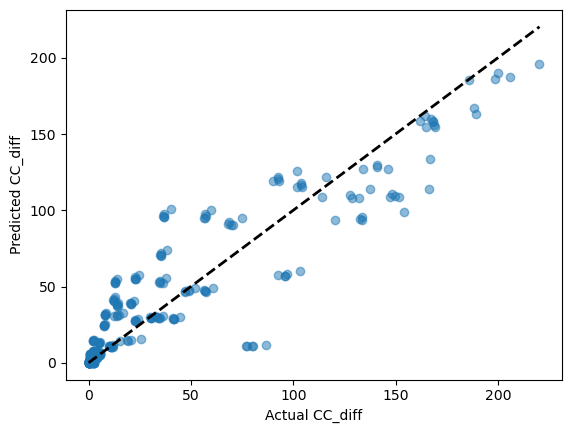

In [123]:
plt.scatter(df_pred['cc_diff'], df_pred['Adjusted_Predicted4'], alpha=0.5, label='CC_diff')
plt.plot([df_pred['cc_diff'].min(), df_pred['cc_diff'].max()], [df_pred['cc_diff'].min(), df_pred['cc_diff'].max()], 'k--', lw=2)
plt.ylabel('Predicted CC_diff')
plt.xlabel('Actual CC_diff')
plt.show()

In [74]:
from joblib import dump
dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [94]:
df_pred

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,difference,hour,Predicted,Adjusted_Predicted,Adjusted_Predicted2,Adjusted_Predicted3
0,104983,6,2.31,2.69,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522,0.576734,0.567278,-1.015243
1,104984,7,2.38,2.79,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522,0.583832,0.583107,-0.223384
2,104985,8,2.37,2.83,1.9,2024-02-23 08:00:00,5.2,95,1,17.0,...,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522,0.573184,0.563211,-2.071192
3,104986,9,2.44,2.84,2.2,2024-02-23 08:00:00,5.2,95,1,17.0,...,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522,0.699770,0.690031,12.596866
4,104987,10,2.32,2.68,1.8,2024-02-23 08:00:00,5.2,95,1,17.0,...,1.0,1.0,1013.05,0.0,0 days 03:00:00,8,0.591522,0.524088,0.553981,-6.329439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,106185,8,3.80,4.19,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900,5.592971,5.495651,3.109186
253,106186,9,4.02,4.39,0.8,2024-03-04 08:00:00,9.6,88,3,0.5,...,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900,6.828158,6.733132,17.777245
250,106183,6,3.70,4.24,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900,5.627603,5.535335,4.165136
251,106184,7,3.80,3.99,0.9,2024-03-04 08:00:00,9.6,88,3,0.5,...,-1.0,0.0,1004.72,0.0,0 days 03:00:00,8,5.771900,5.696865,5.689794,4.956994


In [109]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 0 to 254
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   255 non-null    int64         
 1   device_id            255 non-null    int64         
 2   active_power         255 non-null    float64       
 3   direct_power         255 non-null    float64       
 4   charge_capacity      255 non-null    float64       
 5   date_time            255 non-null    datetime64[ns]
 6   T                    255 non-null    float64       
 7   U                    255 non-null    int64         
 8   Ff                   255 non-null    int64         
 9   RRR                  255 non-null    float64       
 10  DD_WE                255 non-null    int64         
 11  DD_NS                255 non-null    int64         
 12  Po(p)                255 non-null    float64       
 13  POA                  255 non-null    flo

In [131]:

start_date = '2024-02-24'
end_date = '2024-03-03 12:00:00 '

filtered_df = df_pred[(df_pred['date_time'] >= start_date) & (df_pred['date_time'] <= end_date)]

filtered_df[['device_id','date_time','cc_diff','Adjusted_Predicted4']]

,device_id,date_time,cc_diff,Adjusted_Predicted4
25,6,2024-02-24 08:00:00,3.8,3.502602
26,7,2024-02-24 08:00:00,3.9,3.430764
27,8,2024-02-24 08:00:00,3.8,3.458806
28,9,2024-02-24 08:00:00,4.1,3.614270
29,10,2024-02-24 08:00:00,3.9,3.428058
...,...,...,...,...
230,6,2024-03-03 11:00:00,141.1,129.669565
231,7,2024-03-03 11:00:00,146.4,127.010045
232,8,2024-03-03 11:00:00,140.9,128.048200
233,9,2024-03-03 11:00:00,167.0,133.803627


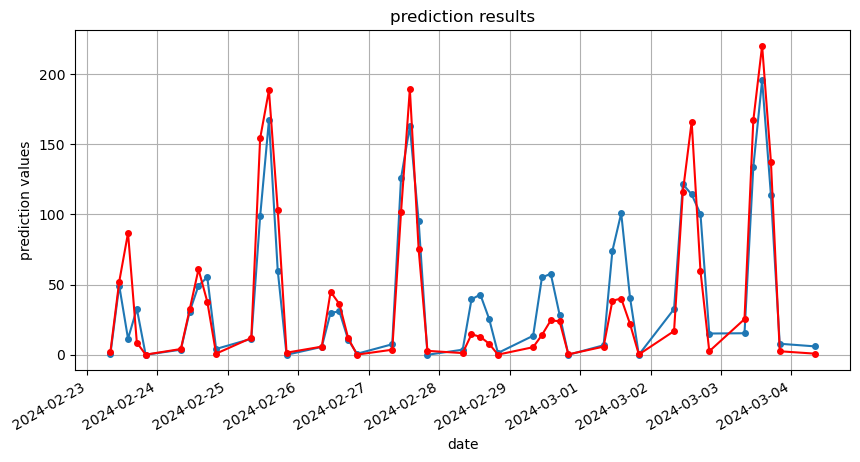

In [151]:
import matplotlib.dates as mdates
df_pred9 = df_pred[df_pred['device_id']==9]

plt.figure(figsize=(10, 5))  # Adjust the size of the plot
plt.plot(df_pred9['date_time'], df_pred9['Adjusted_Predicted4'], marker='o', linestyle='-', markersize=4)
plt.plot(df_pred9['date_time'], df_pred9['cc_diff'], marker='o', linestyle='-', markersize=4, color='red')

plt.title('prediction results')
plt.xlabel('date')
plt.ylabel('prediction values')
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()

plt.show()

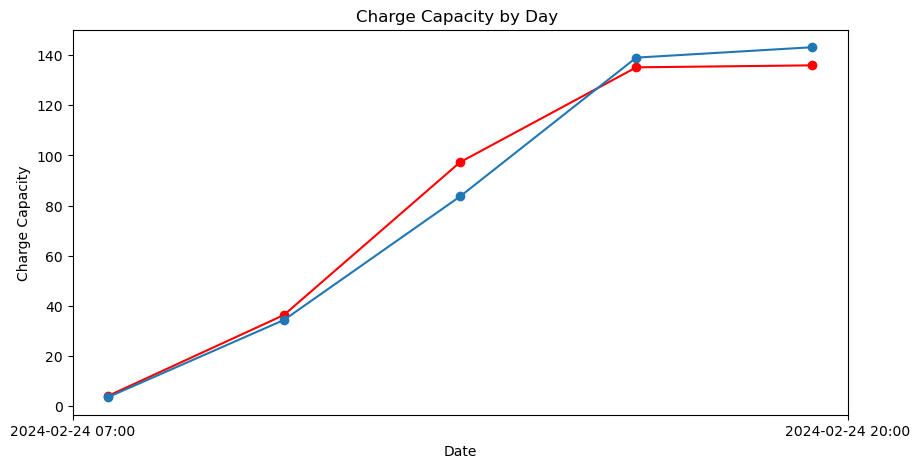

In [181]:
date = '2024-02-24'

df_pred9_date = df_pred9[df_pred9['date_time'].dt.date == pd.Timestamp(date).date()]
df_pred9_date = df_pred9_date.copy()
df_pred9_date['date'] = df_pred9_date['date_time'].dt.date

df_pred9_date = df_pred9_date.copy()
df_pred9_date['cumulative_cc_diff'] = df_pred9_date.groupby('date')['cc_diff'].cumsum()
df_pred9_date['cumulative_pd_diff'] = df_pred9_date.groupby('date')['Adjusted_Predicted4'].cumsum()

plt.figure(figsize=[10, 5])
plt.plot(df_pred9_date['date_time'], df_pred9_date['cumulative_cc_diff'], marker='o', linestyle='-', color='red')
plt.plot(df_pred9_date['date_time'], df_pred9_date['cumulative_pd_diff'], marker='o', linestyle='-')

plt.title('Charge Capacity by Day ')
plt.xlabel('Date')
plt.ylabel('Charge Capacity')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:00'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=0)

plt.show()